## Red Wine Quality Project

# Importing important libraries

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [47]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [48]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1302,9.1,0.370,0.32,2.1,0.064,4.0,15.0,0.99576,3.30,0.80,11.2,6
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
581,12.3,0.500,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5
172,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,6
337,7.8,0.430,0.32,2.8,0.080,29.0,58.0,0.99740,3.31,0.64,10.3,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
# Checking dataset columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [52]:
# Checking for the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the wine dataset. 

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

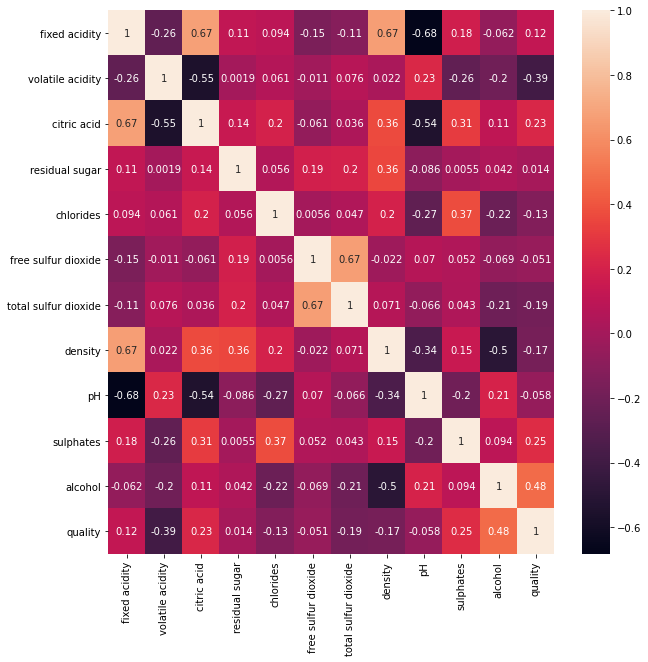

In [53]:
# Checking for the correlation 
plt.figure(figsize=(10,10))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show

The highest correlation value is found for the alcohol.


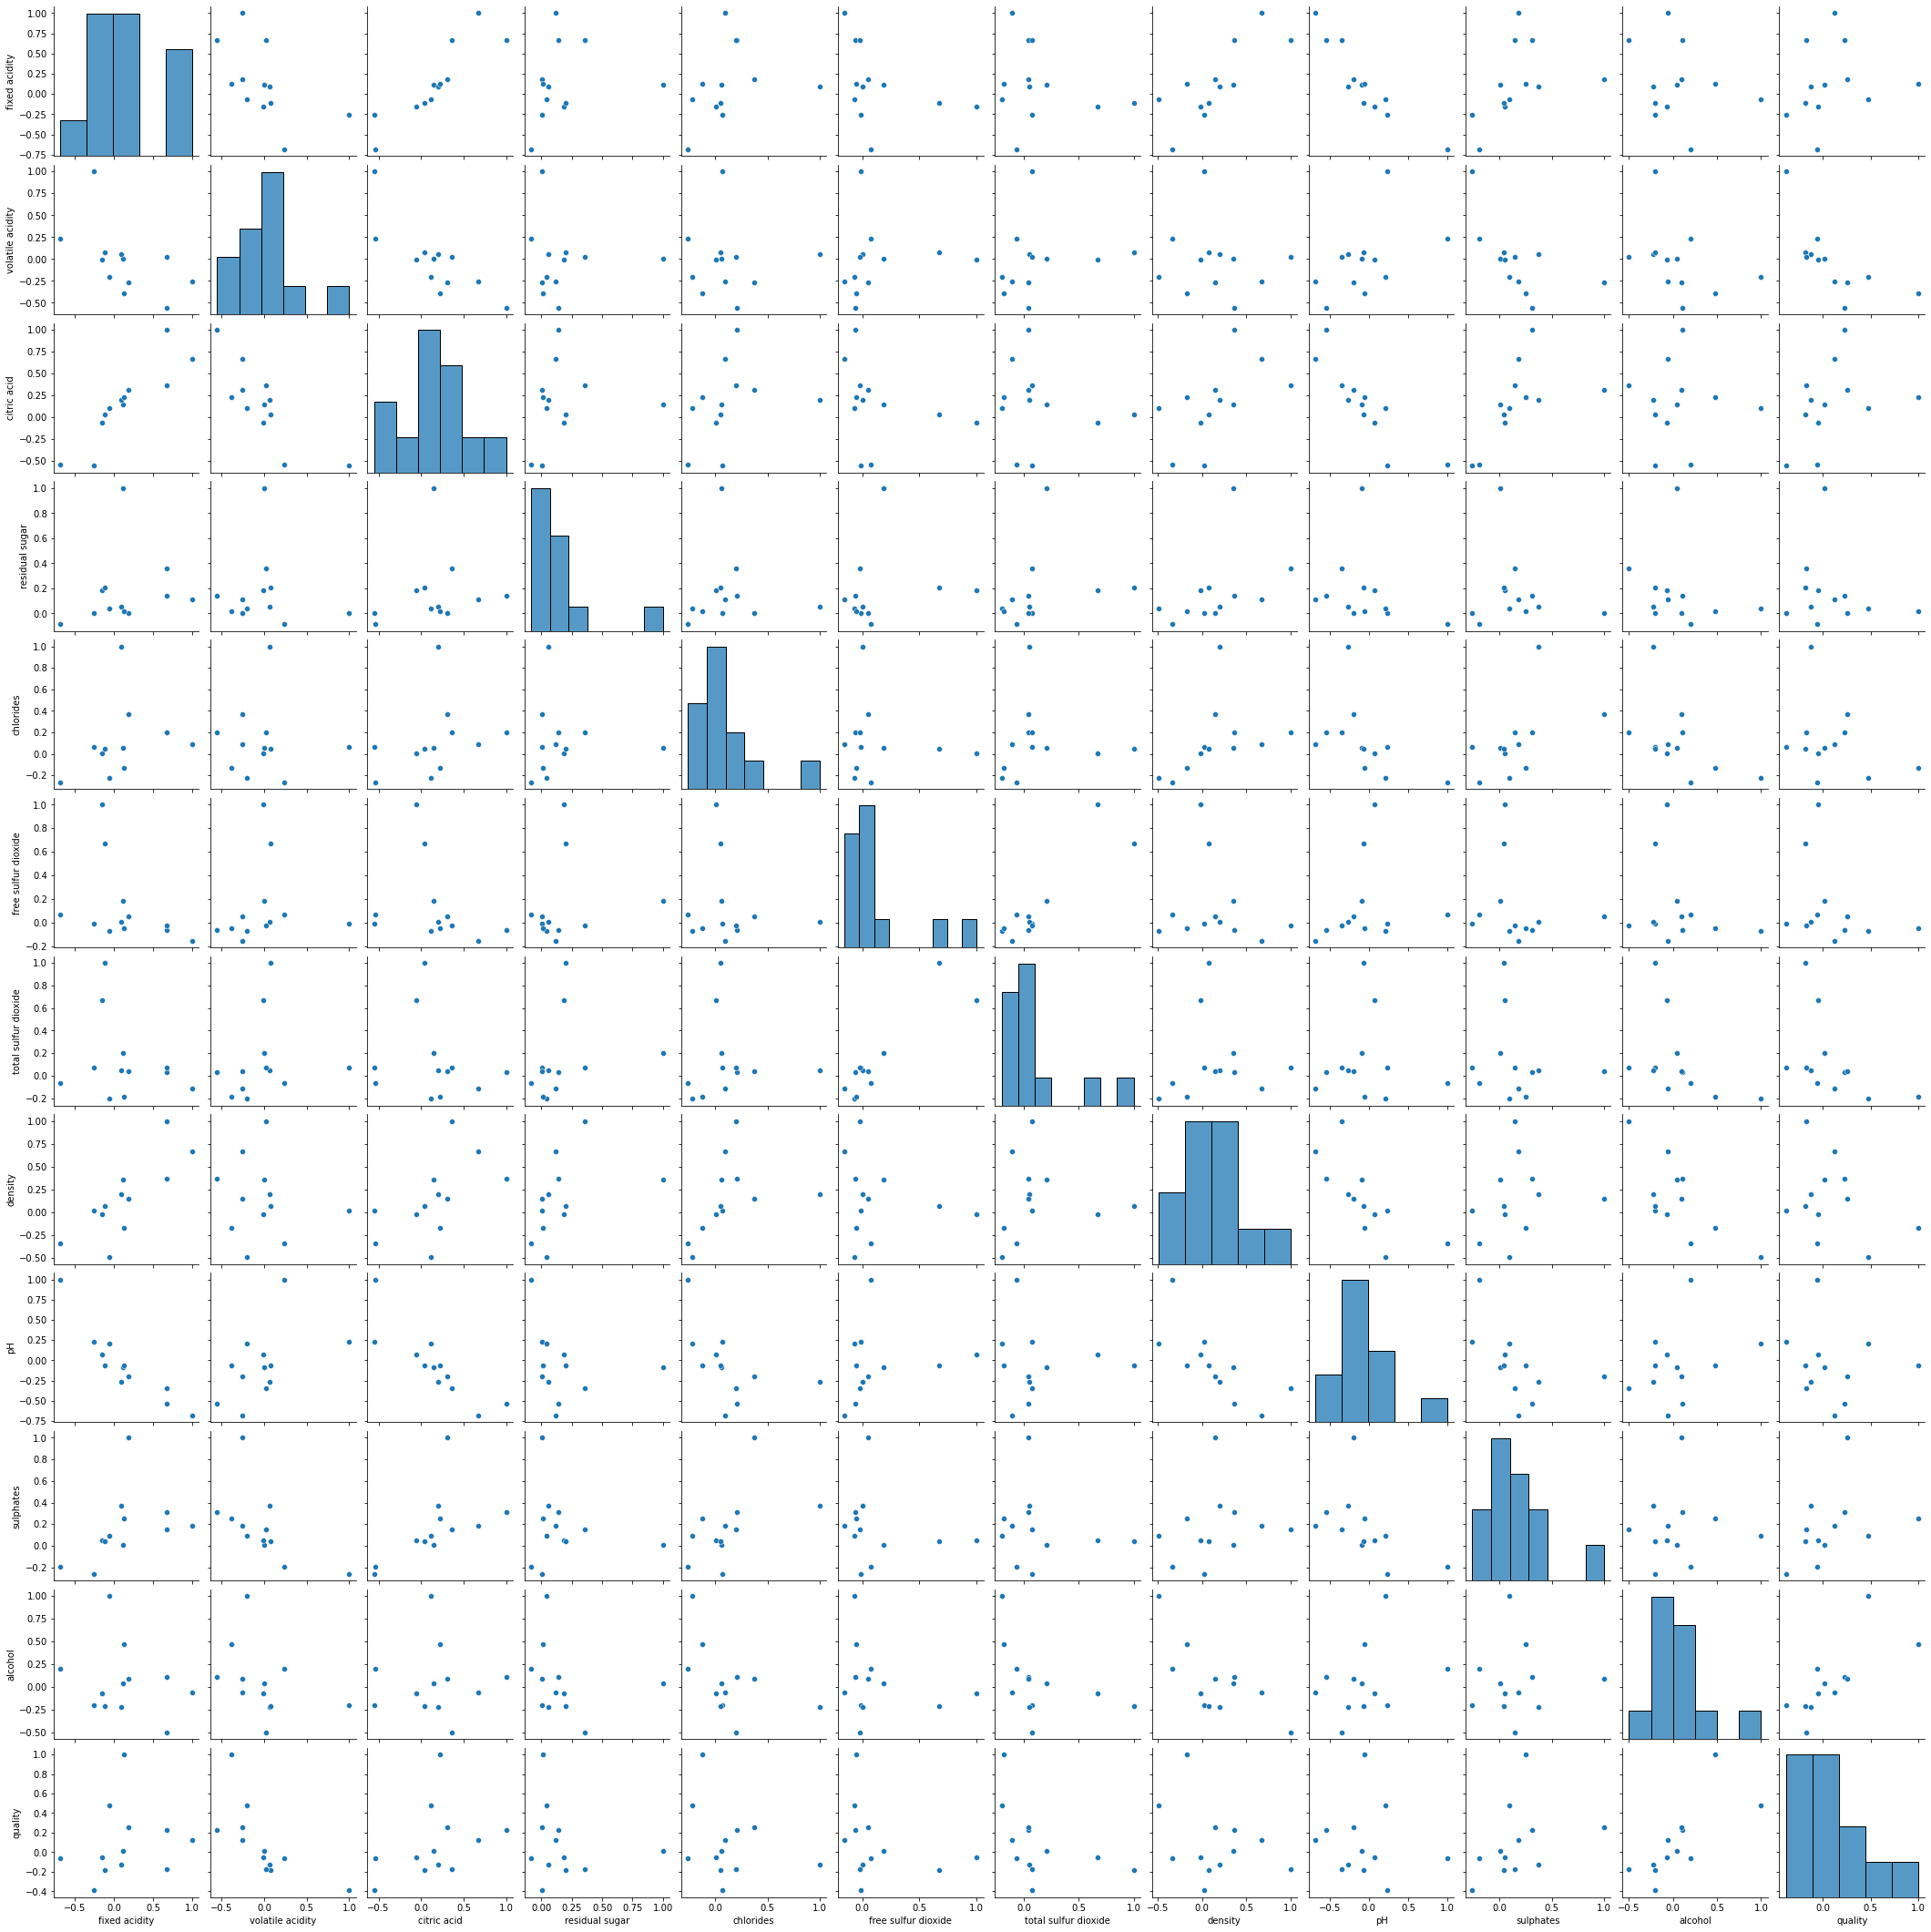

In [54]:
sns.pairplot(corr)

There is no strong relationship among the features , thus multicollinearuty doesnt exist.

In [17]:
# The target variable is quality. # Checking the outliers in features using boxplot 

In [70]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [75]:
wine_quality=[]
for value in df['quality']:
    if value>=6:
        wine_quality.append('1')
    else:
        wine_quality.append('0')
df['wine_class']=wine_quality
   

In [76]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


<AxesSubplot:xlabel='wine_class', ylabel='count'>

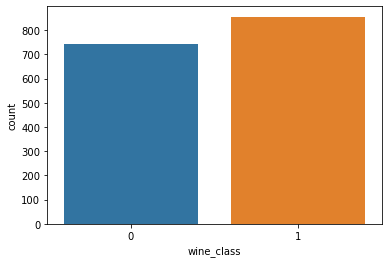

In [77]:
sns.countplot(df['wine_class'])

In [78]:
df['wine_class'].value_counts()

1    855
0    744
Name: wine_class, dtype: int64

## Checking outliers

## Percentage loss

# Checking the skewness

In [62]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

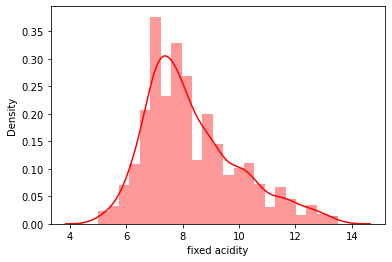

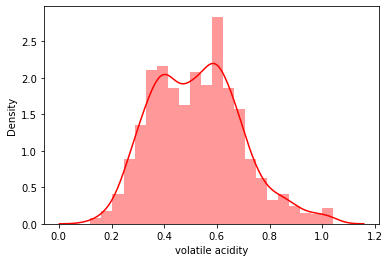

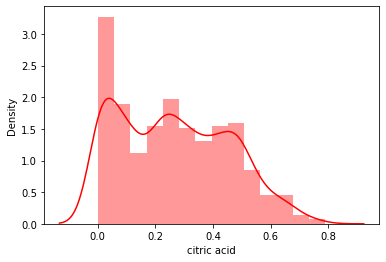

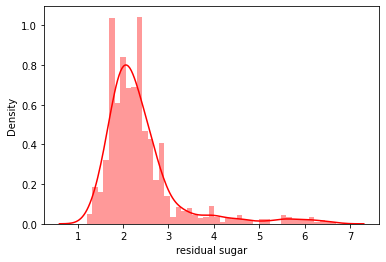

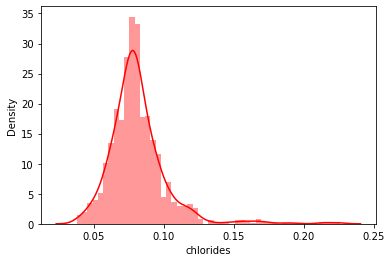

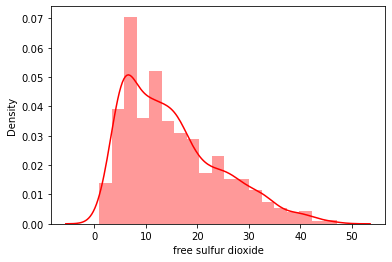

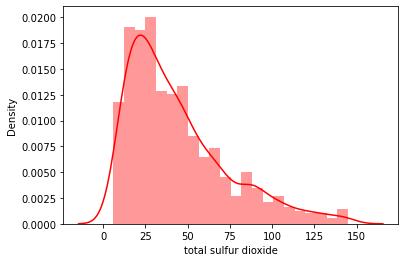

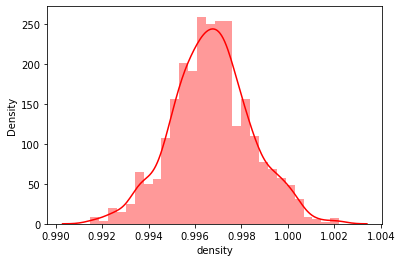

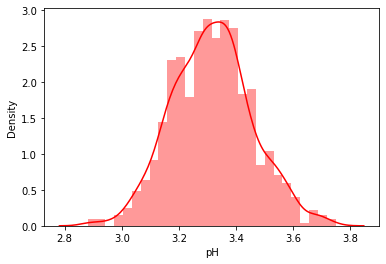

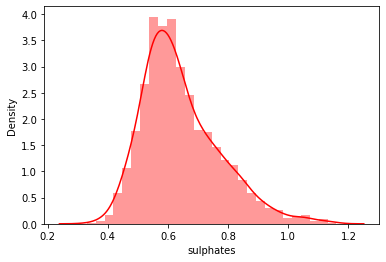

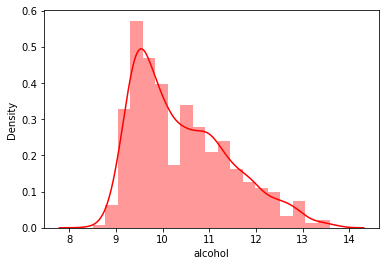

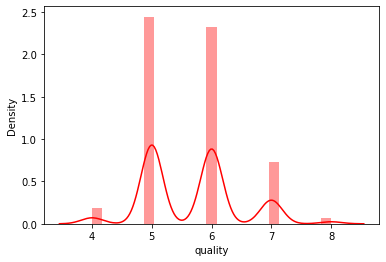

In [63]:
for column in df_new.describe().columns:
    sns.distplot(df_new[column],color='r')
    plt.show()

The skewness is more in residual sugar , chlorides and total sulphur oxides

In [64]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df_new)
x=pd.DataFrame(x_new,columns=df_new.columns)

In [65]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340,-0.833369
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340,-0.833369
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340,0.502485
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424,-0.833369
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037,-0.833369
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563,0.502485
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882,0.502485
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166,-0.833369


In [66]:
#Validating the skewness values
x.skew().sort_values(ascending=False)

alcohol                 0.114658
sulphates               0.020799
fixed acidity           0.018666
citric acid             0.018049
volatile acidity        0.004945
quality                 0.002703
pH                     -0.000074
density                -0.001043
residual sugar         -0.004606
total sulfur dioxide   -0.005813
free sulfur dioxide    -0.021455
chlorides              -0.114658
dtype: float64

In [67]:
x.skew()[np.abs(x.skew()<0.25)].all()

True

This conforms that skewness has been removed and we can proceed with next steps

In [80]:
df.drop(['quality','wine_class'],axis=1,inplace=True)

In [81]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [82]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df)
x=pd.DataFrame(x_new,columns=df.columns)

In [84]:
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

## This conforms the skewness has been removed and we can proceed with the next steps

In [85]:
## Checking outliers

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

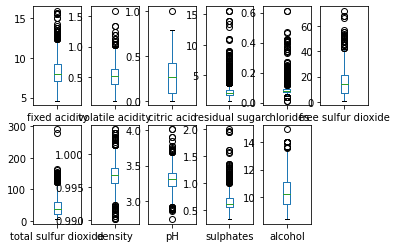

In [86]:
df.plot(kind='box',subplots=True,layout=(2,6))

In [87]:
df['quality']=wine_quality

In [129]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [130]:
df_new=df

In [131]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

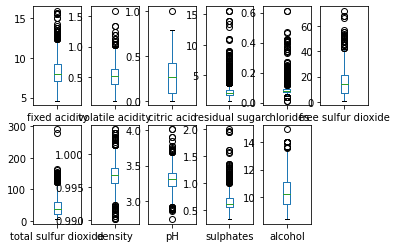

In [128]:
df_new.plot(kind='box',subplots=True,layout=(2,6))

In [140]:
df_new['quality'].astype(int)
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [141]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [149]:
df_num=pd.to_numeric(df_new['quality'])
df_new['Quality']=df_num
df_new
df_new.info()
df_new.drop('quality',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
 12  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [150]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [165]:
# Outlier removal using z score method
from scipy.stats import zscore
z=np.abs(zscore(df_new))
threshold=3
df_new2=df_new[(z<3).all(axis=1)]

In [167]:
df_new2.shape

(1458, 12)

# Percentage loss

In [168]:
p_loss=(1599-1458)/1458*100
p_loss

9.670781893004115

In [169]:
df_new2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [170]:
x=df_new2.drop('Quality',axis=1)

In [171]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [172]:
y =df_new2['Quality']

In [173]:
x.shape

(1458, 11)

In [174]:
y.shape

(1458,)

# Scaling the dataset

In [180]:
x=StandardScaler().fit_transform(x)
print(x)

[[-0.55404532  1.0387081  -1.38741253 ...  1.37476832 -0.63538217
  -0.99657302]
 [-0.31118983  2.10132549 -1.38741253 ... -0.82375195  0.2897715
  -0.60491468]
 [-0.31118983  1.39291389 -1.17821377 ... -0.3982319   0.05848308
  -0.60491468]
 ...
 [-1.22189791 -0.0829436  -0.70751654 ...  0.73648824  0.82944447
   0.57006031]
 [-1.4647534   0.71401945 -0.75981623 ...  1.80028837  0.52105991
  -0.21325635]
 [-1.40403953 -1.26362959  1.07067297 ...  0.52372821  0.13557922
   0.57006031]]


# Building classification model

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=256)

In [183]:
x_train

array([[-0.97904242, -0.37811509, -0.13221993, ...,  0.52372821,
        -0.32699761,  0.17840198],
       [-0.18976208, -0.1419779 ,  0.65227544, ...,  0.80740825,
        -0.17280534,  0.27631657],
       [ 1.02451536, -1.20459529,  1.69826927, ..., -0.82375195,
         1.06073288, -0.80074385],
       ...,
       [ 1.26737085, -1.67686968,  1.17527236, ..., -0.96559197,
         3.21942477,  0.57006031],
       [ 0.41737664,  1.74711969, -1.12591407, ...,  0.31096819,
        -0.86667059, -0.40908552],
       [ 0.84237375,  0.9796738 ,  0.2861776 , ..., -0.18547187,
        -0.17280534, -0.31117093]])

In [184]:
print(x_train.shape)

(1093, 11)


In [185]:
print(x_test.shape)

(365, 11)


In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [187]:
LG = LogisticRegression()
LG.fit(x_train,y_train)
predict=LG.predict(x_test)
print(accuracy_score(y_test,predict))
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

0.736986301369863
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       177
           1       0.74      0.75      0.75       188

    accuracy                           0.74       365
   macro avg       0.74      0.74      0.74       365
weighted avg       0.74      0.74      0.74       365

[[128  49]
 [ 47 141]]


In [189]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
gb=GaussianNB()
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
r2score=r2_score(y_test,pred_gb)
cvsscore=cross_val_score(GaussianNB(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.10785551147974526
0.7310375399547374
-0.8388930514344827


In [190]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
r2score=r2_score(y_test,pred_dtc)
cvsscore=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.11882437793003975
0.7227782832878374
-0.8416026612178772


In [192]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
r2score=r2_score(y_test,pred_rfc)
cvsscore=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.16636614977761743
0.7978406943375095
-0.631474544559892


In [193]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
r2score=r2_score(y_test,pred_abc)
cvsscore=cross_val_score(AdaBoostClassifier(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.07494891212886157
0.7475093908214927
-0.8224583029503543


In [194]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
r2score=r2_score(y_test,pred_gbc)
cvsscore=cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.05667748527467242
0.7767842560836192
-0.7201067708089468


In [195]:
## None of the model works 

# Saving the file

In [209]:
import pickle
filename="redwine_dataset.pkl"
pickle.dump(df_new,open(filename,"wb"))